# Prediction Of Oil, Gas and Water Production Rates Using Historical Data From DSEAT field. 

## Aim
1. To Understand the historical Data we are working with 
2. Ensure the data is preprocessed i.e Cleaned and free or errors
3. Build a machine learning model to predict oil, gas and water
4. Optimze hyperparameters of the model to have a more accurate model
5. Use the trained model to predcit oil, gas and water on a new dataset from DSEAT Field.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv("C:/Users/user/Downloads/dseats_2024_training_dataset (1).csv")
training_data.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                6925 non-null   object 
 1   Field Name                     6925 non-null   object 
 2   WELL_BORE_CODE                 6925 non-null   object 
 3   N_WELL_BORE_CODE               6925 non-null   int64  
 4   WellBore Name                  6925 non-null   object 
 5   FLOW_KIND                      6925 non-null   object 
 6   WELL_TYPE                      6925 non-null   object 
 7   Downhole Pressure (PSI)        6925 non-null   float64
 8   Downhole Temperature (Kelvin)  6925 non-null   float64
 9   Average Tubing Pressure        6925 non-null   float64
 10  Annulus Pressure (PSI)         6925 non-null   float64
 11  AVG WHP (PSI)                  6925 non-null   float64
 12  Choke Size                     6919 non-null   f

In [4]:
training_data.describe()

,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000
mean,107.297040,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310
std,0.980161,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008
min,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,107.000000,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300
50%,107.000000,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200
75%,108.000000,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100
max,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


In [5]:
training_data.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')

In [6]:
print(training_data[ 'Field Name'].unique())
print(training_data['WELL_BORE_CODE'].unique())
print(training_data['N_WELL_BORE_CODE'].unique())
print(training_data['WellBore Name'].unique())
print(training_data['FLOW_KIND'].unique())
print(training_data['WELL_TYPE'].unique())

['DSEAT']
['DSEAT-001-F-1 C' 'DSEAT-001-F-11 H' 'DSEAT-001-F-12 H'
 'DSEAT-001-F-14 H' 'DSEAT-001-F-15 D']
[105 106 107 108 109]
['001-F-1 C' '001-F-11' '001-F-12' '001-F-14' '001-F-15 D']
['production']
['OP' 'WI']


# Observation From Categorical Columns
1. Data is Obtained from a Single field only i.e DSEAT
2. Well bore code is a combination of the field name and Wellbore name
3. N_well_bore_code are numerical values that represent each well bore
4. They are all production flow kind
5. The well type are either oil production or water injection

## To reduce redundancy we will;
1. drop the field name columns since we are dealing with a single field only
2. use only the N_well_bore_code as it is sufficent in identifying the different wellbores and drop the wellbore name and code columns
3. Drop the Flow kind as they are all production

In [7]:
training_data.drop(['Field Name', 'WELL_BORE_CODE','WellBore Name', 'FLOW_KIND'], axis = 1, inplace = True)

In [8]:
training_data.head()

,PRODUCTION DATE,N_WELL_BORE_CODE,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
1,08/04/2014 00:00,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2,09/04/2014 00:00,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
3,10/04/2014 00:00,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
4,11/04/2014 00:00,105,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


# What we will do to Date

while the date column is very essential while collecting the data, for this process it will be more informative if we represent it as number of days since operations began for each well

## Firstly Lets make column names more consistent to speed up the workflow

In [9]:
training_data.rename(columns={'PRODUCTION DATE': 'date', 'N_WELL_BORE_CODE': 'well_code',
                              'WELL_TYPE': 'well_type', 'Downhole Pressure (PSI)': 'downhole_pressure_psi',
                              'Downhole Temperature (Kelvin)': 'downhole_temperature_kelvin',
                              'Average Tubing Pressure': 'average_tubing_pressure',
                              'Annulus Pressure (PSI)': 'annulus_pressure_psi', 'AVG WHP (PSI)': 'average_whp_psi',
                              'Choke Size': 'choke_size', 'Oil Production (stb/day)': 'oil_production_stb/day',
                              'Gas Volume (scf/day)':'gas_volume_scf/day',
                              'Water Production (stb/day)':'water_Production_stb/day'}, inplace = True)

In [10]:
training_data['date'] = pd.to_datetime(training_data['date'], format='%d/%m/%Y %H:%M')
# lets sort the dataset by well code and date, looks like its already done that way but just to be extra sure

training_data = training_data.sort_values(by=['well_code', 'date'])
# Number of days since production began == nodspb
training_data['nodspb'] = training_data.groupby('well_code').cumcount()+1
training_data.head()

,date,well_code,well_type,downhole_pressure_psi,downhole_temperature_kelvin,average_tubing_pressure,annulus_pressure_psi,average_whp_psi,choke_size,oil_production_stb/day,gas_volume_scf/day,water_Production_stb/day,nodspb
0,2014-04-07,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,1
1,2014-04-08,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,2
2,2014-04-09,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,3
3,2014-04-10,105,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,4
4,2014-04-11,105,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0,5


## we have our Number of days since production began column (nodspb)
This takes an assumption that from the data provided for each well, no day is skipped. we can check that

In [11]:
training_data.duplicated(['date', 'well_code']).sum()

0

Our Assumption Holds True

## Handling Missing Values
Upon examination of the Data set, the Null Values in Choke Size will be filled with 0

In [12]:
training_data['choke_size'].fillna(0, inplace = True)
training_data.isnull().sum()

date                           0
well_code                      0
well_type                      0
downhole_pressure_psi          0
downhole_temperature_kelvin    0
average_tubing_pressure        0
annulus_pressure_psi           0
average_whp_psi                0
choke_size                     0
oil_production_stb/day         0
gas_volume_scf/day             0
water_Production_stb/day       0
nodspb                         0
dtype: int64

In [13]:
# using 1 to indicate oil prod well and 2 to represent water injection wells
training_data['well_type'].replace({'OP':1, 'WI': 2}, inplace = True)

## Visualizing the Distribution Accross the Data set

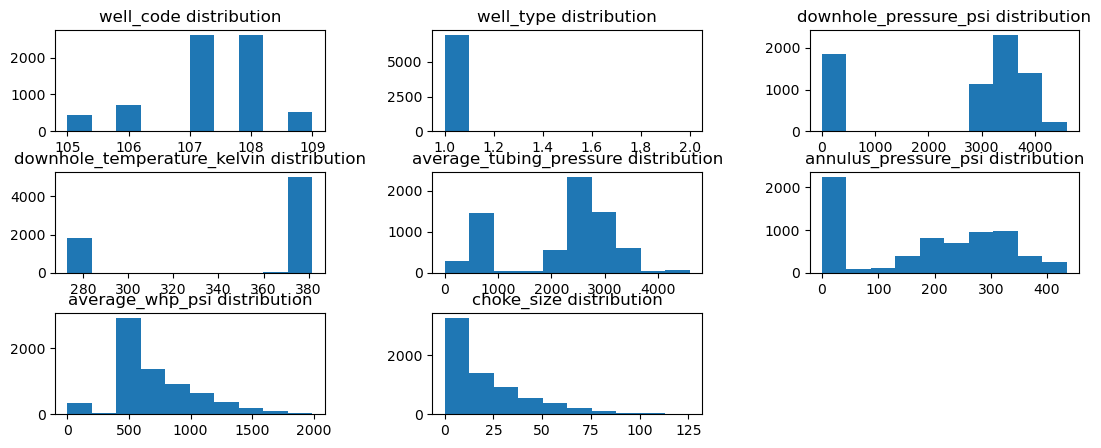

In [14]:
hist_columns = ['well_code', 'well_type', 'downhole_pressure_psi', 'downhole_temperature_kelvin',
                'average_tubing_pressure', 'annulus_pressure_psi', 'average_whp_psi', 'choke_size']
i = 1
for item in hist_columns:
    plt.subplot(3, 3, i)
    plt.hist(training_data[item])
    plt.title(f'{item} distribution')
    i += 1
plt.subplots_adjust(left=0.1, right=1.7, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

## Visualizing the Correlations

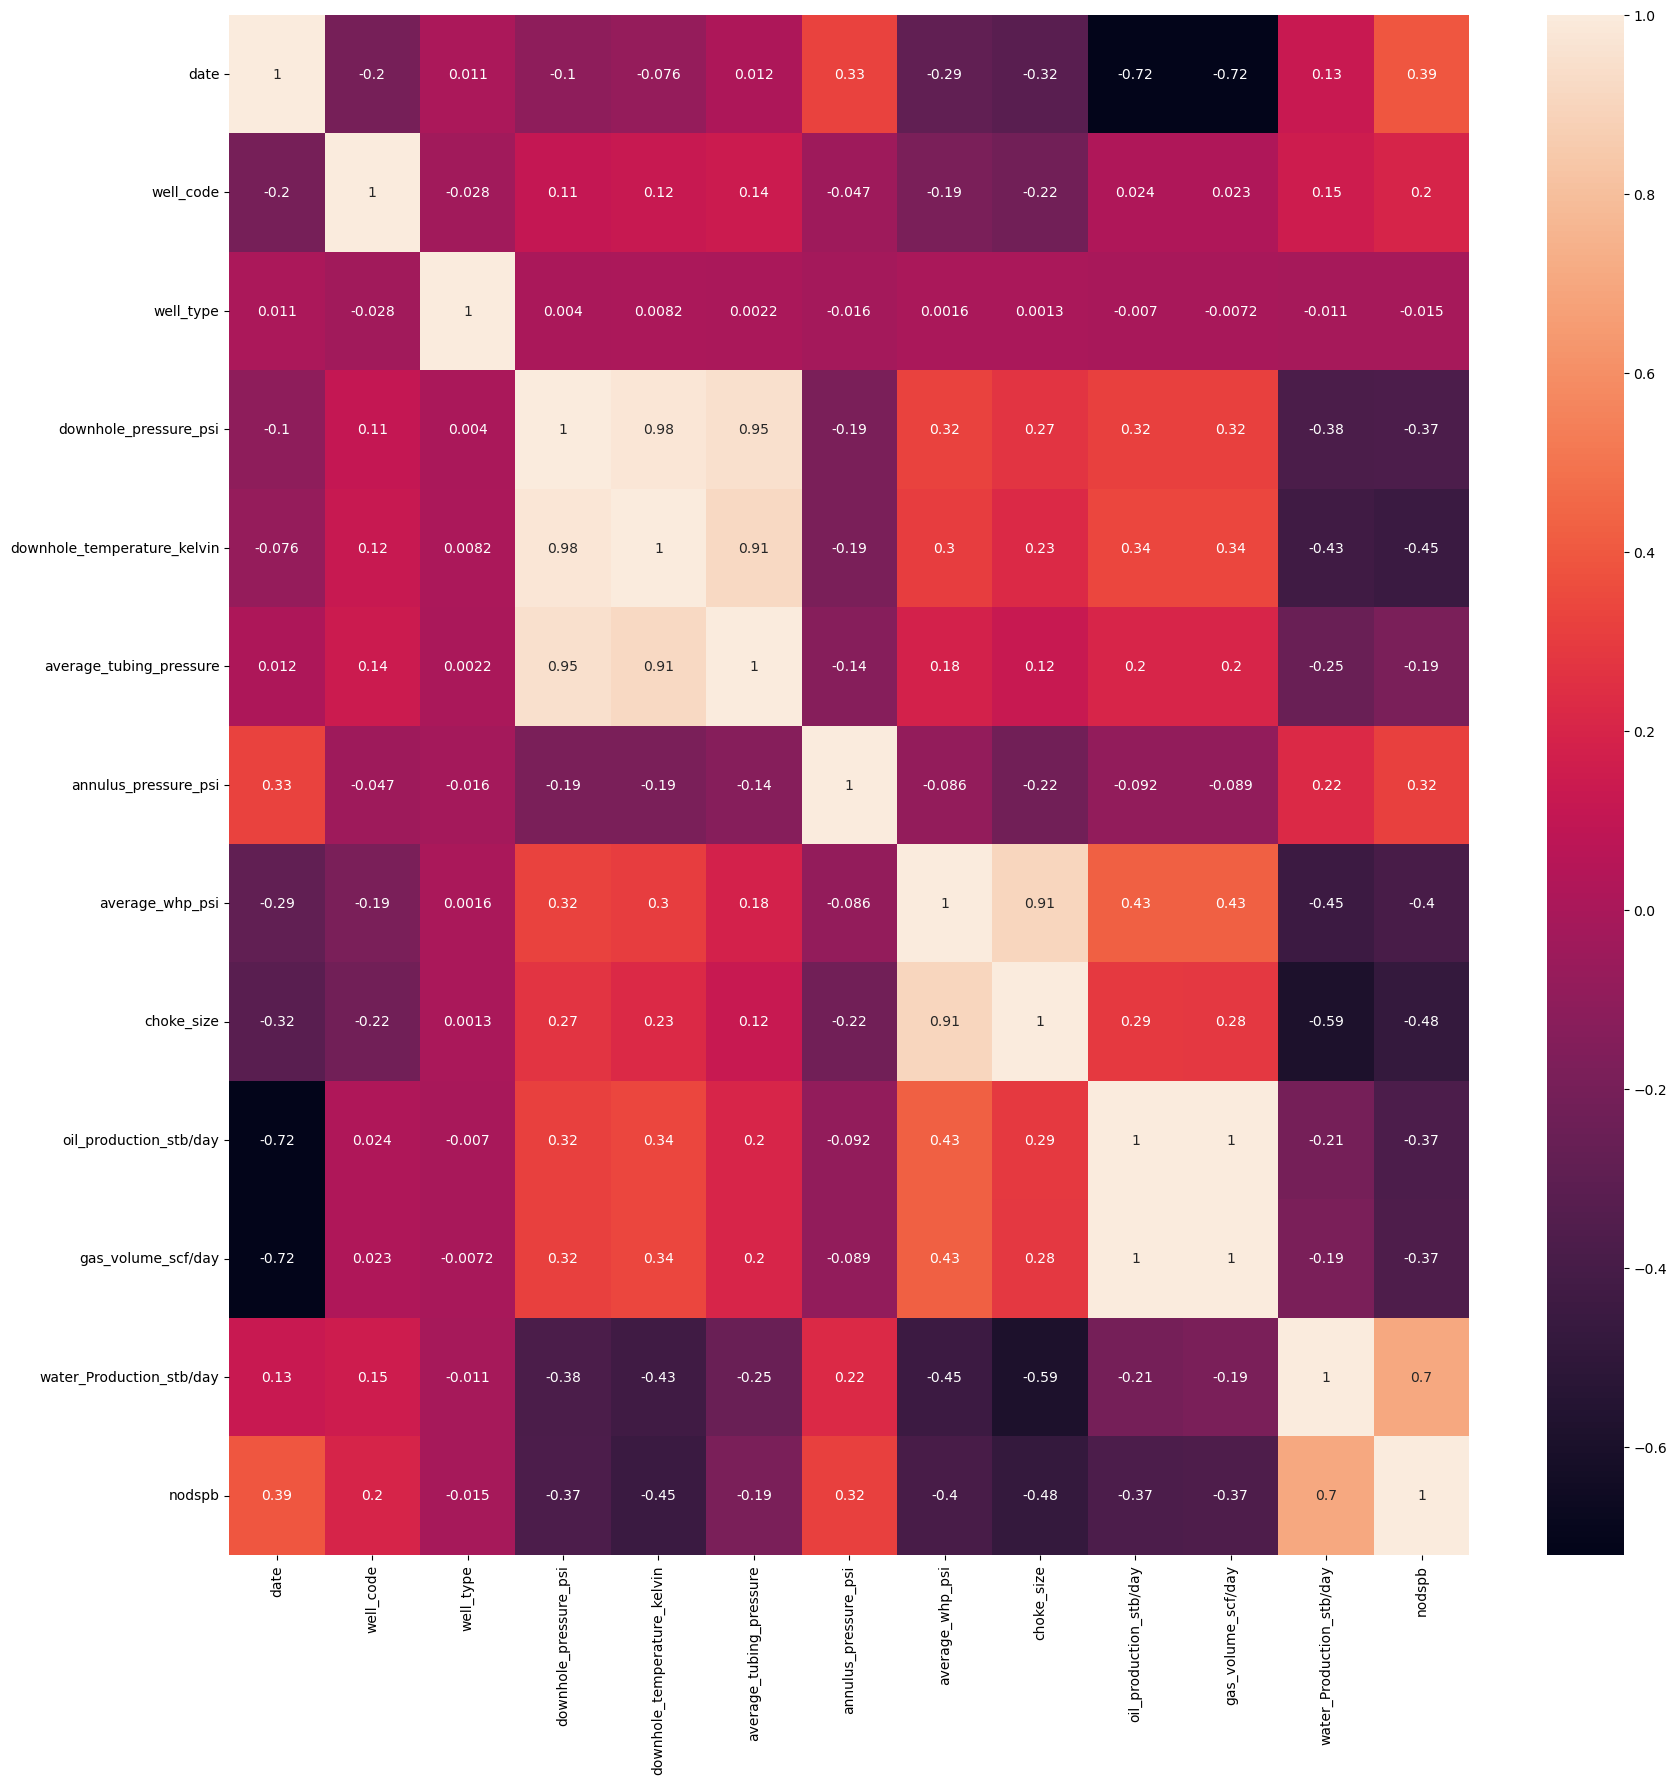

In [15]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(training_data.corr(), annot = True)
plt.show()

In [17]:
training_data.drop(columns='date', inplace = True)

## Spliting and Scaling Numerical Features

To Build Efficent Machine learning Algorithms its important to perform cross validation and scaling 
Cross Validation is a technique used to access the performance of a machine learning model. It helps prevent overfitting. 

Scaling, or normalization, is the process of adjusting the range of feature values to ensure that they are on a similar scale
Properly scaled features can lead to better model accuracy by enabling the algorithm to make more precise adjustments during training.

model will be cross validated using the train_test_split with a test size of 0.2
the model will be normalized using the minmaxscaler 

In [18]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
import joblib

X = training_data.drop(columns=['oil_production_stb/day', 'gas_volume_scf/day', 'water_Production_stb/day'])
y = training_data[['oil_production_stb/day', 'gas_volume_scf/day', 'water_Production_stb/day']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Save the scalers
joblib.dump(scaler_x, 'scaler_x.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

# Transform the testing data
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

## Building Model

The Model will be built using a Multioutput Random Forest regressor and will be evaluated using the mean squared error, r2 score and mean absolute error.

the best score obtainable for rmse is 0


the best score obtainable for r2 score is 1


the best score obtainable for mae is 0

The closer we are to the best score the more accurate our model is

RMSE: [0.05292919 0.05481257 0.04780739]
R²: [0.95174525 0.94623544 0.95536479]
MAE: [0.01799722 0.01855523 0.017564  ]

Average metrics across all folds:
Average RMSE: [0.05292919 0.05481257 0.04780739]
Average R²: [0.95174525 0.94623544 0.95536479]
Average MAE: [0.01799722 0.01855523 0.017564  ]


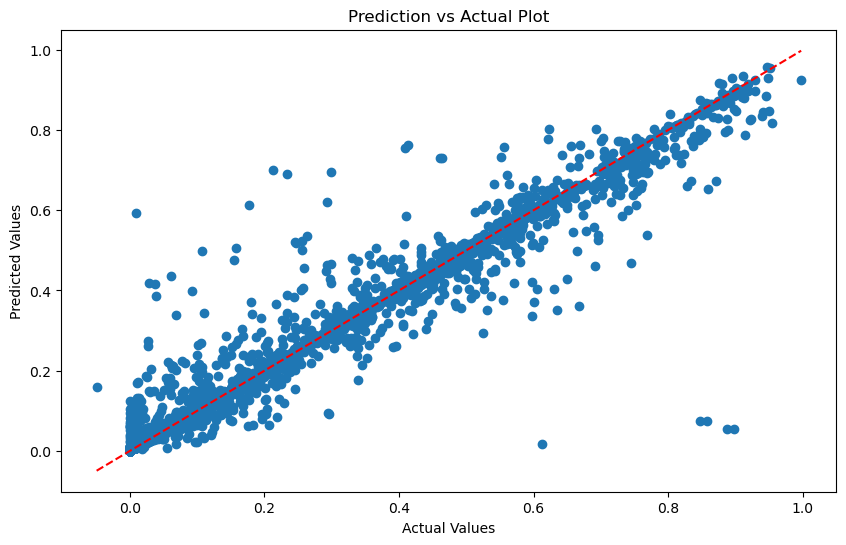

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_test, y_pred):
    """Calculate evaluation metrics."""
    rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
    r2 = r2_score(y_test, y_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    return rmse, r2, mae

def print_metrics(rmse, r2, mae):
    """Print evaluation metrics."""
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")

def plot_model(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction vs Actual Plot')
    plt.show()

def main():
   
    # Assume X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled are already defined
    model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=50))

    rmse_scores, r2_scores, mae_scores = [], [], []

    model.fit(X_train_scaled, y_train_scaled)
    y_pred_scaled = model.predict(X_test_scaled)

    rmse, r2, mae = evaluate_model(y_test_scaled, y_pred_scaled)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)

    print_metrics(rmse, r2, mae)

    print("\nAverage metrics across all folds:")
    print(f"Average RMSE: {np.mean(rmse_scores, axis=0)}")
    print(f"Average R²: {np.mean(r2_scores, axis=0)}")
    print(f"Average MAE: {np.mean(mae_scores, axis=0)}")

    plot_model(y_test_scaled, y_pred_scaled)

# Run the main function
main()

# Results

Average metrics across all folds


N/B: the list contains three values which represent the score of the evaluation metric for Oil production, gas production and water production.

## Average RMSE

oil = 0.05292919, Best Outcome = 0

Gas =  0.05481257, Best Outcome = 0

Water  0.04780739, Best Outcome = 0

## Average R_2
Oil = 0.95174525, Best Outcome = 1

Gas = 0.94623544, Best Outcome = 1

Water = 0.95536479, Best Outcome = 1

## Average MAE:

Oil = 0.01799722, Best Outcome = 0

Gas = 0.01855523, Best Outcome = 0

water = 0.017564, Best Outcome = 0





# Model Optimization - Hyperparameter Tuning

Hyperparameters directly control model structure, function, and performance. Hyperparameter tuning allows data scientists to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.

## Steps we are taking to tune our parameters

1. Obtain Hyper parameters available
2. Using the Sci-kit Learn documentation, select variations of Hyperparamenters
3. Find the best Hyperparameters
4. Rebuild our model using the best hyperparameters


## Available Hyperparameters we can Tune

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=50))
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'estimator': RandomForestRegressor(random_state=50),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 50,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': None}


The Following Hyperparameters will be adjusted
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

In [21]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['sqrt', 'log2', 1.0]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'estimator__n_estimators': n_estimators,
               'estimator__max_features': max_features,
               'estimator__max_depth': max_depth,
               'estimator__min_samples_split': min_samples_split,
               'estimator__min_samples_leaf': min_samples_leaf,
               'estimator__bootstrap': bootstrap}

pprint(random_grid)

{'estimator__bootstrap': [True, False],
 'estimator__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'estimator__max_features': ['sqrt', 'log2', 1.0],
 'estimator__min_samples_leaf': [1, 2, 4],
 'estimator__min_samples_split': [2, 5, 10],
 'estimator__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


## Finding the best set of Hyperparameters

In [22]:
from sklearn.model_selection import train_test_split

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train_scaled)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END estimator__bootstrap=False, estimator__max_depth=20, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=900; total time=  41.9s
[CV] END estimator__bootstrap=False, estimator__max_depth=20, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=900; total time=  41.8s
[CV] END estimator__bootstrap=False, estimator__max_depth=20, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=900; total time=  41.2s
[CV] END estimator__bootstrap=False, estimator__max_depth=30, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=2, estimator__n_estimators=400; total time=  18.4s
[CV] END estimator__bootstrap=False, estimator__max_depth=30, estimator__max_features=log2, estimator__min_samples_leaf=2, es

[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=800; total time=  36.5s
[CV] END estimator__bootstrap=False, estimator__max_depth=80, estimator__max_features=1.0, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500; total time=  50.6s
[CV] END estimator__bootstrap=False, estimator__max_depth=80, estimator__max_features=1.0, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500; total time=  51.5s
[CV] END estimator__bootstrap=False, estimator__max_depth=80, estimator__max_features=1.0, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500; total time=  49.0s
[CV] END estimator__bootstrap=False, estimator__max_depth=40, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=500; tota

[CV] END estimator__bootstrap=False, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=2, estimator__n_estimators=500; total time=  26.9s
[CV] END estimator__bootstrap=False, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=2, estimator__n_estimators=500; total time=  25.9s
[CV] END estimator__bootstrap=True, estimator__max_depth=50, estimator__max_features=sqrt, estimator__min_samples_leaf=4, estimator__min_samples_split=2, estimator__n_estimators=1000; total time=  41.8s
[CV] END estimator__bootstrap=True, estimator__max_depth=50, estimator__max_features=sqrt, estimator__min_samples_leaf=4, estimator__min_samples_split=2, estimator__n_estimators=1000; total time=  45.1s
[CV] END estimator__bootstrap=True, estimator__max_depth=50, estimator__max_features=sqrt, estimator__min_samples_leaf=4, estimator__min_samples_split=2, estimator__n_estimators=1000; tota

[CV] END estimator__bootstrap=False, estimator__max_depth=10, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=400; total time=  13.0s
[CV] END estimator__bootstrap=False, estimator__max_depth=10, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=400; total time=  13.4s
[CV] END estimator__bootstrap=False, estimator__max_depth=10, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=400; total time=  13.3s
[CV] END estimator__bootstrap=True, estimator__max_depth=10, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=2, estimator__n_estimators=200; total time=   7.7s
[CV] END estimator__bootstrap=True, estimator__max_depth=10, estimator__max_features=sqrt, estimator__min_samples_leaf=2, estimator__min_samples_split=2, estimator__n_estimators=200; tot

[CV] END estimator__bootstrap=False, estimator__max_depth=10, estimator__max_features=log2, estimator__min_samples_leaf=1, estimator__min_samples_split=5, estimator__n_estimators=700; total time=  24.4s
[CV] END estimator__bootstrap=False, estimator__max_depth=60, estimator__max_features=1.0, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=100; total time=  10.9s
[CV] END estimator__bootstrap=False, estimator__max_depth=60, estimator__max_features=1.0, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=100; total time=  10.5s
[CV] END estimator__bootstrap=False, estimator__max_depth=60, estimator__max_features=1.0, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=100; total time=  10.6s
[CV] END estimator__bootstrap=True, estimator__max_depth=70, estimator__max_features=log2, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=800; tota

[CV] END estimator__bootstrap=False, estimator__max_depth=50, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=400; total time=  17.9s
[CV] END estimator__bootstrap=False, estimator__max_depth=50, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=400; total time=  18.9s
[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=700; total time=  27.0s
[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=700; total time=  26.2s
[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=700; tota

[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300; total time=  11.2s
[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300; total time=  11.5s
[CV] END estimator__bootstrap=True, estimator__max_depth=40, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300; total time=  11.5s
[CV] END estimator__bootstrap=True, estimator__max_depth=60, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=600; total time=  31.1s
[CV] END estimator__bootstrap=True, estimator__max_depth=60, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=10, estimator__n_estimators=600; tota

[CV] END estimator__bootstrap=False, estimator__max_depth=70, estimator__max_features=log2, estimator__min_samples_leaf=2, estimator__min_samples_split=2, estimator__n_estimators=500; total time=  23.9s
[CV] END estimator__bootstrap=True, estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=600; total time=  25.6s
[CV] END estimator__bootstrap=True, estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=600; total time=  24.9s
[CV] END estimator__bootstrap=True, estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=600; total time=  26.0s
[CV] END estimator__bootstrap=True, estimator__max_depth=60, estimator__max_features=log2, estimator__min_samples_leaf=4, estimator__min_samples_split=2, estimator__n_estimators=1000; t

RandomizedSearchCV(cv=3,
                   estimator=MultiOutputRegressor(estimator=RandomForestRegressor(random_state=50)),
                   n_iter=100, n_jobs=1,
                   param_distributions={'estimator__bootstrap': [True, False],
                                        'estimator__max_depth': [10, 20, 30, 40,
                                                                 50, 60, 70, 80,
                                                                 90, 100, 110,
                                                                 None],
                                        'estimator__max_features': ['sqrt',
                                                                    'log2',
                                                                    1.0],
                                        'estimator__min_samples_leaf': [1, 2,
                                                                        4],
                                        'estimator__min_samples_split': [2, 5,
                                                                         10],
                                        'estimator__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500, 600,
                                                                    700, 800,
                                                                    900,
                                                                    1000]},
                   random_state=42, verbose=2)

## The best Parameters

In [23]:
rf_random.best_params_

{'estimator__n_estimators': 500,
 'estimator__min_samples_split': 5,
 'estimator__min_samples_leaf': 1,
 'estimator__max_features': 'sqrt',
 'estimator__max_depth': None,
 'estimator__bootstrap': False}

## Building the Model using the best parameters

RMSE: [0.05049954 0.05201793 0.04564428]
R²: [0.95607371 0.9515781  0.95931258]
MAE: [0.01768081 0.01864    0.01765056]

Average metrics across all folds:
Average RMSE: [0.05049954 0.05201793 0.04564428]
Average R²: [0.95607371 0.9515781  0.95931258]
Average MAE: [0.01768081 0.01864    0.01765056]


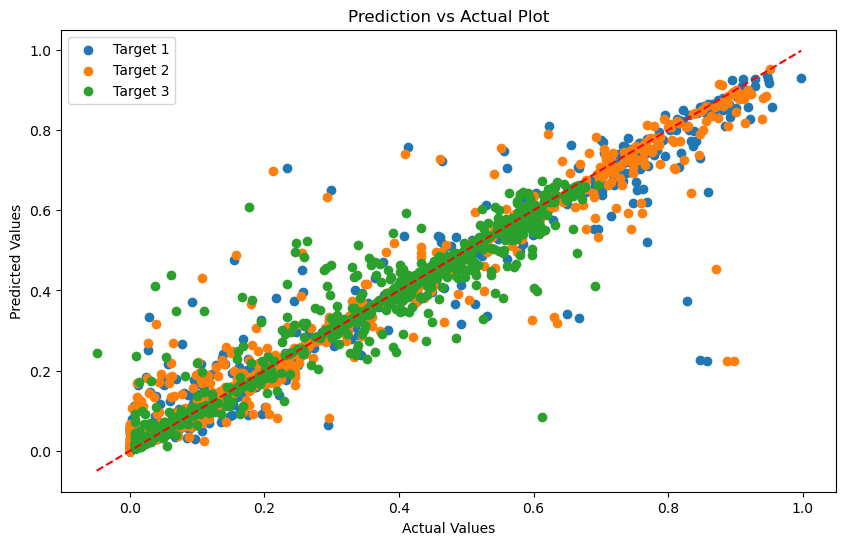

In [29]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_test, y_pred):
    """Calculate evaluation metrics."""
    rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
    r2 = r2_score(y_test, y_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    return rmse, r2, mae

def print_metrics(rmse, r2, mae):
    """Print evaluation metrics."""
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print(f"MAE: {mae}")


def plot_model(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    for i in range(y_test.shape[1]):
        plt.scatter(y_test[:, i], y_pred[:, i], label=f'Target {i+1}')
    plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Prediction vs Actual Plot')
    plt.legend()
    plt.show()

def main():
    model = rf_random.best_estimator_
    rmse_scores, r2_scores, mae_scores = [], [], []
    y_pred_scaled = model.predict(X_test_scaled)
    rmse, r2, mae = evaluate_model(y_test_scaled, y_pred_scaled)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)

    print_metrics(rmse, r2, mae)

    print("\nAverage metrics across all folds:")
    print(f"Average RMSE: {np.mean(rmse_scores, axis=0)}")
    print(f"Average R²: {np.mean(r2_scores, axis=0)}")
    print(f"Average MAE: {np.mean(mae_scores, axis=0)}")
    plot_model(y_test_scaled, y_pred_scaled)


main()

## Results after tuning Parameters

Average metrics across all folds


N/B: the list contains three values which represent the score of the evaluation metric for Oil production, gas production and water production.

## Average RMSE

oil = 0.05049954, Best Outcome = 0

Gas =  0.05201793, Best Outcome = 0

Water  0.04564428, Best Outcome = 0

## Average R_2
Oil = 0.95607371, Best Outcome = 1

Gas = 0.9515781 , Best Outcome = 1

Water = 0.95931258, Best Outcome = 1

## Average MAE:

Oil = 0.01768081, Best Outcome = 0

Gas = 0.01864, Best Outcome = 0

water = 0.01765056, Best Outcome = 0

# Saving our Model

In [30]:
import joblib
model = rf_random.best_estimator_
joblib.dump(model, 'oil_gas_water_model_1.joblib')

['oil_gas_water_model_1.joblib']

# Loading Validation Data 

In [31]:
validation_data = pd.read_excel("C:/Users/user/Downloads/validation data.xlsx")
validation_data.tail()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),nodspb
2070,2016-09-12,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,5015.648165,363.18433,5015.648165,0.0,0.0,13.87619,NaN,NaN,NaN,973
2071,2016-09-13,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,5015.648165,363.18433,5015.648165,0.0,0.0,13.97408,NaN,NaN,NaN,974
2072,2016-09-14,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,5015.648165,363.18433,5015.648165,0.0,0.0,14.06316,NaN,NaN,NaN,975
2073,2016-09-15,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,5015.648165,363.18433,5015.648165,0.0,0.0,14.17445,NaN,NaN,NaN,976
2074,2016-09-16,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,5015.648165,363.18433,5015.648165,0.0,0.0,14.23277,NaN,NaN,NaN,977


In [32]:
validation_data.columns

Index(['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE',
       'WellBore Name', 'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'nodspb'],
      dtype='object')

In [33]:
dropped = ['Field Name', 'WELL_BORE_CODE', 'WellBore Name', 'PRODUCTION DATE', 'FLOW_KIND']
validation_data.drop(columns = dropped, inplace = True)
validation_data

,N_WELL_BORE_CODE,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day),nodspb
0,105,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN,451
1,105,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN,452
2,105,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN,453
3,105,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN,454
4,105,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN,455
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,109,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN,973
2071,109,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN,974
2072,109,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN,975
2073,109,OP,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN,976


In [34]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   N_WELL_BORE_CODE               2075 non-null   int64  
 1   WELL_TYPE                      2075 non-null   object 
 2   Downhole Pressure (PSI)        2075 non-null   float64
 3   Downhole Temperature (Kelvin)  2075 non-null   float64
 4   Average Tubing Pressure        2075 non-null   float64
 5   Annulus Pressure (PSI)         2075 non-null   float64
 6   AVG WHP (PSI)                  2075 non-null   float64
 7   Choke Size                     2075 non-null   float64
 8   Oil Production (stb/day)       0 non-null      float64
 9   Gas Volume (scf/day)           0 non-null      float64
 10  Water Production (stb/day)     0 non-null      float64
 11  nodspb                         2075 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage:

Renaming Validation Data set Columns 

In [35]:
validation_data.rename(columns={ 'N_WELL_BORE_CODE': 'well_code',
                              'WELL_TYPE': 'well_type', 'Downhole Pressure (PSI)': 'downhole_pressure_psi',
                              'Downhole Temperature (Kelvin)': 'downhole_temperature_kelvin',
                              'Average Tubing Pressure': 'average_tubing_pressure',
                              'Annulus Pressure (PSI)': 'annulus_pressure_psi', 'AVG WHP (PSI)': 'average_whp_psi',
                              'Choke Size': 'choke_size', 'Oil Production (stb/day)': 'oil_production_stb/day',
                              'Gas Volume (scf/day)':'gas_volume_scf/day',
                              'Water Production (stb/day)':'water_Production_stb/day'}, inplace = True)

In [36]:
validation_data['well_type'].replace({'OP':1, 'WI': 2}, inplace = True)

In [37]:
validation_data

,well_code,well_type,downhole_pressure_psi,downhole_temperature_kelvin,average_tubing_pressure,annulus_pressure_psi,average_whp_psi,choke_size,oil_production_stb/day,gas_volume_scf/day,water_Production_stb/day,nodspb
0,105,1,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN,451
1,105,1,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN,452
2,105,1,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN,453
3,105,1,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN,454
4,105,1,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN,455
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,109,1,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,NaN,NaN,NaN,973
2071,109,1,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,NaN,NaN,NaN,974
2072,109,1,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,NaN,NaN,NaN,975
2073,109,1,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,NaN,NaN,NaN,976


# Normalizing Validation Dataset

In [38]:
# Select numerical columns
numerical_columns = ['well_code', 'well_type', 'downhole_pressure_psi',
                     'downhole_temperature_kelvin', 'average_tubing_pressure',
                     'annulus_pressure_psi', 'average_whp_psi', 'choke_size','nodspb']

scaler = joblib.load('scaler_x.joblib')


# Fit and transform the numerical columns
validation_data[numerical_columns] = scaler.fit_transform(validation_data[numerical_columns])

# Loading already Trained Model

In [39]:
model = joblib.load('oil_gas_water_model_1.joblib')


# Predicting Oil, Gas and Water on New Data 

In [40]:
predictions_scaled = model.predict(validation_data[numerical_columns])

C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [42]:
predictions_unscaled = scaler_y.inverse_transform(predictions_scaled)

# Inverse Transforming Predictions

In [43]:
predictions = pd.DataFrame(predictions_unscaled, columns=['oil_production_stb/day', 'gas_volume_scf/day', 'water_production_stb/day'])
predictions

,oil_production_stb/day,gas_volume_scf/day,water_production_stb/day
0,2078.788034,1.626142e+06,1509.286538
1,3496.914377,3.055433e+06,830.880014
2,3329.842647,3.156726e+06,644.912222
3,4197.912569,4.145331e+06,293.009890
4,5066.880713,4.518104e+06,153.389575
...,...,...,...
2070,321.454801,1.016245e+05,178.631995
2071,321.454801,1.016245e+05,178.631995
2072,321.454801,1.016245e+05,179.074340
2073,321.853000,1.016245e+05,179.074340


# Inverse Tranforming Validation Data set

In [47]:
validation_numerical = validation_data[numerical_columns]
validation_numerical = scaler.inverse_transform(validation_numerical)


# Combining Both Datasets

In [49]:
validation_final_df = pd.DataFrame(validation_numerical, columns=['well_code', 'well_type', 'downhole_pressure_psi',
                     'downhole_temperature_kelvin', 'average_tubing_pressure',
                     'annulus_pressure_psi', 'average_whp_psi', 'choke_size','nodspb'])
combined_data = pd.concat([validation_final_df, predictions], axis=1)
combined_data

,well_code,well_type,downhole_pressure_psi,downhole_temperature_kelvin,average_tubing_pressure,annulus_pressure_psi,average_whp_psi,choke_size,nodspb,oil_production_stb/day,gas_volume_scf/day,water_production_stb/day
0,105.0,1.0,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,451.0,2078.788034,1.626142e+06,1509.286538
1,105.0,1.0,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,452.0,3496.914377,3.055433e+06,830.880014
2,105.0,1.0,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,453.0,3329.842647,3.156726e+06,644.912222
3,105.0,1.0,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,454.0,4197.912569,4.145331e+06,293.009890
4,105.0,1.0,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,455.0,5066.880713,4.518104e+06,153.389575
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,109.0,1.0,5015.648165,363.184330,5015.648165,0.0,0.000000,13.876190,973.0,321.454801,1.016245e+05,178.631995
2071,109.0,1.0,5015.648165,363.184330,5015.648165,0.0,0.000000,13.974080,974.0,321.454801,1.016245e+05,178.631995
2072,109.0,1.0,5015.648165,363.184330,5015.648165,0.0,0.000000,14.063160,975.0,321.454801,1.016245e+05,179.074340
2073,109.0,1.0,5015.648165,363.184330,5015.648165,0.0,0.000000,14.174450,976.0,321.853000,1.016245e+05,179.074340


# Saving Predicted Oil, Gas and water Dataset

In [50]:
combined_data.to_csv('udosen_david_2024_DSEATS_Datathon_1.csv', index=False)